# Predicting Student Test Scores
This Kaggle Playground Series hackathon focuses on building machine learning models to predict student test scores using a structured tabular dataset. The training and test data were synthetically generated from a deep learning model trained on the original Exam Score Prediction dataset. While the feature distributions closely resemble the original data, they are not identical, which introduces realistic noise and variation. Participants are encouraged to explore both the provided synthetic data and the original dataset to understand distributional differences and assess whether combining both sources improves predictive performance. The competition emphasizes experimentation, feature engineering, and model optimization in a controlled, learning-oriented environment.

Goal
The primary goal of this hackathon is to accurately predict students’ test scores based on the available features and achieve the best possible performance on the leaderboard evaluation metric.

Objectives
The specific objectives of the competition are:

To understand and analyze tabular educational data and its underlying feature distributions.

To apply data preprocessing, feature engineering, and exploratory data analysis techniques effectively.

To develop, train, and evaluate regression models capable of predicting student test scores with high accuracy.

To compare model performance when trained solely on the synthetic dataset versus a combination of synthetic and original datasets.

To encourage iterative experimentation and practical machine learning skills development within the Kaggle Playground Series framework.

## Dataset Description: Student Exam Performance

This dataset is designed to model and predict student academic performance based on demographic, behavioral, environmental, and academic factors. It consists of a **training set** (with target variable) and a **test set** (without target variable). There are no missing values in either dataset.

---

## Column Descriptions

### 1. `id`
- **Type:** Integer  
- **Description:** Unique identifier for each student record.  
- **Usage:** Identification only; should be excluded from model training.

---

### 2. `age`
- **Type:** Integer  
- **Range:** 17–24  
- **Description:** Age of the student in years.  
- **Insight:** Represents student maturity level; may have indirect influence on performance when combined with other factors.

---

### 3. `gender`
- **Type:** Categorical (object)  
- **Values:** `male`, `female`, `other`  
- **Description:** Gender of the student.  
- **Insight:** Useful for demographic analysis; impact on exam score is likely indirect.

---

### 4. `course`
- **Type:** Categorical (object)  
- **Examples:** `b.sc`, `b.tech`, `bca`, `ba`, `diploma`  
- **Description:** Academic program or course of study.  
- **Insight:** Different courses may vary in difficulty and grading patterns.

---

### 5. `study_hours`
- **Type:** Float  
- **Range:** ~0.08–7.91  
- **Description:** Average number of hours spent studying per day.  
- **Insight:** One of the strongest predictors of exam performance.

---

### 6. `class_attendance`
- **Type:** Float  
- **Range:** ~40.6–99.4  
- **Description:** Percentage of classes attended by the student.  
- **Insight:** Higher attendance is generally associated with better academic outcomes.

---

### 7. `internet_access`
- **Type:** Categorical (object)  
- **Values:** `yes`, `no`  
- **Description:** Indicates whether the student has access to the internet.  
- **Insight:** Affects access to learning resources, especially online materials.

---

### 8. `sleep_hours`
- **Type:** Float  
- **Range:** ~4.1–9.9  
- **Description:** Average number of hours the student sleeps per day.  
- **Insight:** Both insufficient and excessive sleep may negatively impact performance.

---

### 9. `sleep_quality`
- **Type:** Categorical (object)  
- **Values:** `poor`, `average`, `good`  
- **Description:** Self-reported quality of sleep.  
- **Insight:** Captures rest effectiveness beyond total sleep duration.

---

### 10. `study_method`
- **Type:** Categorical (object)  
- **Examples:** `self-study`, `group study`, `coaching`, `online videos`, `mixed`  
- **Description:** Primary learning approach used by the student.  
- **Insight:** Different methods may suit different learning styles and affect outcomes.

---

### 11. `facility_rating`
- **Type:** Categorical (object)  
- **Values:** `low`, `medium`, `high`  
- **Description:** Quality rating of available learning facilities (e.g., classrooms, libraries).  
- **Insight:** Reflects the learning environment’s supportiveness.

---

### 12. `exam_difficulty`
- **Type:** Categorical (object)  
- **Values:** `easy`, `moderate`, `hard`  
- **Description:** Perceived difficulty level of the exam.  
- **Insight:** Strong contextual factor influencing final exam scores.

---

### 13. `exam_score` (Train only)
- **Type:** Float  
- **Range:** ~19.6–100  
- **Description:** Final exam score obtained by the student.  
- **Role:** Target variable for prediction.  
- **Insight:** Wide distribution allows effective regression modeling.

---

## Summary
- The dataset combines **numerical and categorical features**, requiring encoding strategies for modeling.
- There are **no missing values**, reducing preprocessing complexity.
- Behavioral variables (`study_hours`, `class_attendance`, `sleep_hours`) are expected to dominate predictive power.
- The dataset is well-suited for **regression models**, particularly tree-based and gradient boosting methods.


# EXPLORATORY DATA ANALYSIS

In [ ]:
# Lib Import
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Import
df_train = pd.read_csv("../data/raw/train.csv")
df_test = pd.read_csv("../data/raw/test.csv")

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
df_train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [6]:
df_test.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,other,ba,6.85,65.2,yes,5.2,poor,group study,high,easy
1,630001,18,male,diploma,6.61,45.0,no,9.3,poor,coaching,low,easy
2,630002,24,female,b.tech,6.60,98.5,yes,6.2,good,group study,medium,moderate
3,630003,24,male,diploma,3.03,66.3,yes,5.7,average,mixed,medium,moderate
4,630004,20,female,b.tech,2.03,42.4,yes,9.2,average,coaching,low,moderate


In [8]:
print(df_test.duplicated().sum())
print(df_train.duplicated().sum())

0
0


In [9]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64
id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
dtype: int64


In [10]:
df_train.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


In [11]:
df_test.describe()

,id,age,study_hours,class_attendance,sleep_hours
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000
mean,764999.500000,20.544137,4.003878,71.982509,7.072070
std,77942.430678,2.260452,2.357741,17.414695,1.745513
min,630000.000000,17.000000,0.080000,40.600000,4.100000
25%,697499.750000,19.000000,1.980000,57.000000,5.600000
50%,764999.500000,21.000000,4.010000,72.600000,7.100000
75%,832499.250000,23.000000,6.050000,87.200000,8.600000
max,899999.000000,24.000000,7.910000,99.400000,9.900000


## Dataset Insights: Predicting Student Test Scores

### 1. Dataset Size and Structure
- **Training set:** 630,000 rows with 5 input features and 1 target (`exam_score`).
- **Test set:** 270,000 rows with the same 5 input features.
- The large sample size provides strong statistical reliability and supports complex models without high overfitting risk.

### 2. Train–Test Distribution Consistency
- Feature means, standard deviations, quartiles, and ranges are nearly identical across train and test sets.
- This confirms **no significant distribution shift**, indicating that models trained on the training data should generalize well to the test data.

### 3. Feature-Level Insights

#### `id`
- Acts only as a unique identifier.
- Shows different numeric ranges between train and test but carries **no predictive information**.
- Should be excluded from modeling.

#### `age`
- Range: **17–24 years**, mean ≈ **20.5**.
- Low variance and narrow range suggest limited standalone predictive power.
- May still contribute through interactions with behavioral features.

#### `study_hours`
- Range: **0.08–7.91 hours**, mean ≈ **4.0**.
- High variability relative to the mean.
- Likely one of the **strongest predictors** of exam performance.

#### `class_attendance`
- Range: **40.6%–99.4%**, mean ≈ **72%**.
- Well-distributed and centered.
- Expected to have a **strong positive correlation** with exam scores.

#### `sleep_hours`
- Range: **4.1–9.9 hours**, mean ≈ **7.07**.
- Moderate spread with most values in a healthy sleep range.
- Relationship with exam score may be **nonlinear** (too little or too much sleep may reduce performance).

### 4. Target Variable (`exam_score`)
- Range: **19.6–100**, mean ≈ **62.5**, median ≈ **62.6**.
- Wide spread indicates diverse performance levels.
- Mean and median alignment suggests a **roughly symmetric distribution**, suitable for RMSE/MAE optimization.

### 5. Modeling Implications
- Random train–validation splits are appropriate due to stable distributions.
- Feature scaling is useful for linear and distance-based models.
- Tree-based and boosting models (e.g., Random Forest, XGBoost, LightGBM) are well-suited due to:
  - Nonlinear relationships
  - Feature interactions
- Behavioral features (`study_hours`, `class_attendance`, `sleep_hours`) are expected to dominate model importance.

### 6. Overall Insight
- The dataset is clean, well-balanced, and intentionally designed for regression experimentation.
- Success in this competition depends more on **feature interactions and model choice** than on heavy data cleaning.
- The problem is ideal for benchmarking regression techniques on large-scale tabular data.


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                270000 non-null  int64  
 1   age               270000 non-null  int64  
 2   gender            270000 non-null  object 
 3   course            270000 non-null  object 
 4   study_hours       270000 non-null  float64
 5   class_attendance  270000 non-null  float64
 6   internet_access   270000 non-null  object 
 7   sleep_hours       270000 non-null  float64
 8   sleep_quality     270000 non-null  object 
 9   study_method      270000 non-null  object 
 10  facility_rating   270000 non-null  object 
 11  exam_difficulty   270000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 24.7+ MB


## Suggested Derived (Engineered) Columns

The following features can be computed from the existing columns to capture interactions, nonlinear effects, and higher-level behavioral patterns. These engineered columns are likely to improve model performance.

---

## 1. Study & Attendance Related Features

### `study_effort_index`
**Derived from:** `study_hours`, `class_attendance`  
**Definition:**  
- A combined measure of time investment and consistency.
- Example: `study_hours * (class_attendance / 100)`

**Rationale:**  
Students who study more *and* attend classes regularly tend to perform better than those with only one of the two.

---

### `attendance_level`
**Derived from:** `class_attendance`  
**Definition:**  
- Categorical binning (e.g., `low`, `medium`, `high`)
- Example:
  - `< 60% → low`
  - `60–80% → medium`
  - `> 80% → high`

**Rationale:**  
Reduces noise and allows models to learn attendance thresholds more easily.

---

## 2. Sleep & Health Related Features

### `sleep_balance_score`
**Derived from:** `sleep_hours`  
**Definition:**  
- Distance from optimal sleep (e.g., 7 hours)
- Example: `abs(sleep_hours - 7)`

**Rationale:**  
Captures the idea that both too little and too much sleep may hurt performance.

---

### `sleep_effectiveness`
**Derived from:** `sleep_hours`, `sleep_quality`  
**Definition:**  
- Encode `sleep_quality` numerically (poor=0, average=1, good=2)
- Multiply by `sleep_hours`

**Rationale:**  
Quantity and quality together explain rest effectiveness better than either alone.

---

## 3. Resource & Environment Features

### `learning_resource_access`
**Derived from:** `internet_access`, `facility_rating`  
**Definition:**  
- Binary or ordinal score combining both factors
- Example:
  - Internet = 1, No internet = 0
  - Facility rating mapped to low=0, medium=1, high=2
  - Sum both values

**Rationale:**  
Represents overall access to learning infrastructure.

---

### `facility_internet_interaction`
**Derived from:** `internet_access`, `facility_rating`  
**Definition:**  
- Interaction feature (e.g., internet_access × facility_rating_score)

**Rationale:**  
Good facilities may matter more when internet access is available.

---

## 4. Academic Context Features

### `course_level`
**Derived from:** `course`  
**Definition:**  
- Group courses into categories (e.g., undergraduate, diploma)
- Example:
  - `b.sc`, `b.tech`, `bca`, `ba` → undergraduate
  - `diploma` → diploma

**Rationale:**  
Reduces categorical sparsity and captures academic rigor differences.

---

### `difficulty_encoded`
**Derived from:** `exam_difficulty`  
**Definition:**  
- Ordinal encoding (easy=1, moderate=2, hard=3)

**Rationale:**  
Preserves ordering information lost in one-hot encoding.

---

### `difficulty_study_ratio`
**Derived from:** `study_hours`, `exam_difficulty`  
**Definition:**  
- `study_hours / difficulty_encoded`

**Rationale:**  
Measures whether study time is sufficient relative to exam difficulty.

---

## 5. Learning Strategy Features

### `guided_learning_flag`
**Derived from:** `study_method`  
**Definition:**  
- Binary indicator for structured learning
- Example:
  - coaching, group study → 1
  - self-study, online videos → 0

**Rationale:**  
Structured guidance often impacts comprehension and outcomes.

---

### `study_method_diversity`
**Derived from:** `study_method`  
**Definition:**  
- Flag for mixed or multiple methods
- Example: `mixed → 1`, others → 0

**Rationale:**  
Combining methods may improve retention and understanding.

---

## 6. Demographic Interaction Features

### `age_study_interaction`
**Derived from:** `age`, `study_hours`  
**Definition:**  
- `age * study_hours`

**Rationale:**  
Older students may utilize study time more effectively.

---

### `age_group`
**Derived from:** `age`  
**Definition:**  
- Binned age categories (e.g., 17–18, 19–21, 22–24)

**Rationale:**  
Allows the model to learn age-related patterns without assuming linearity.

---

## 7. Composite Performance Indicators

### `academic_discipline_score`
**Derived from:** `study_hours`, `class_attendance`, `sleep_hours`  
**Definition:**  
- Weighted combination of discipline-related behaviors

**Rationale:**  
Captures consistency and balance in academic habits.

---

## Summary
- Focus on **interaction features**, **ordinal encodings**, and **behavioral composites**.
- These engineered columns are especially effective for tree-based and boosting models.
- Avoid overly complex features early; validate impact using cross-validation.
- Do not derive features using `exam_score` to prevent data leakage.


In [25]:
# Seperating num and cat cols
cat_cols = df_train.select_dtypes(include=["object", "category", "bool"]).columns
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns

type(num_cols)
num_cols = num_cols.drop("id")
num_cols = num_cols.drop("exam_score")

target_col = "exam_score"

In [26]:
print(cat_cols, num_cols)

Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object') Index(['age', 'study_hours', 'class_attendance', 'sleep_hours'], dtype='object')


In [27]:
df_train[cat_cols]

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
0,female,b.sc,no,average,online videos,low,easy
1,other,diploma,yes,poor,self-study,medium,moderate
2,female,b.sc,yes,poor,coaching,high,moderate
3,male,b.sc,yes,average,group study,high,moderate
4,male,bca,yes,good,self-study,high,easy
...,...,...,...,...,...,...,...
629995,female,b.tech,yes,good,mixed,high,moderate
629996,female,ba,yes,average,mixed,low,moderate
629997,male,bca,yes,poor,online videos,low,moderate
629998,male,b.com,yes,average,group study,high,moderate


In [28]:
df_train[num_cols]

,age,study_hours,class_attendance,sleep_hours
0,21,7.91,98.8,4.9
1,18,4.95,94.8,4.7
2,20,4.68,92.6,5.8
3,19,2.00,49.5,8.3
4,23,7.65,86.9,9.6
...,...,...,...,...
629995,18,4.86,70.7,4.1
629996,21,7.08,54.4,4.5
629997,24,0.64,44.2,4.3
629998,20,1.54,75.1,8.2


In [ ]:

class Visualisation:
    
    def __init__(self, df, cols):
        self.df = df
        self.cols = cols
    
    def plot_numeric_distributions(self, bins=30, n_cols=3):
        """
        Plot numeric distributions in a grid layout.

        Parameters:
        bins (int): Number of histogram bins
        n_cols (int): Number of plots per row
        """
        n_plots = len(self.cols)
        n_rows = math.ceil(n_plots / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
        axes = axes.flatten()

        for i, col in enumerate(self.cols):
            axes[i].hist(self.df[col], bins=bins)
            axes[i].set_title(f"{col}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel("Frequency")

        # Remove empty subplots if grid is larger than needed
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()


In [36]:
num_v = Visualisation(df_train, num_cols)

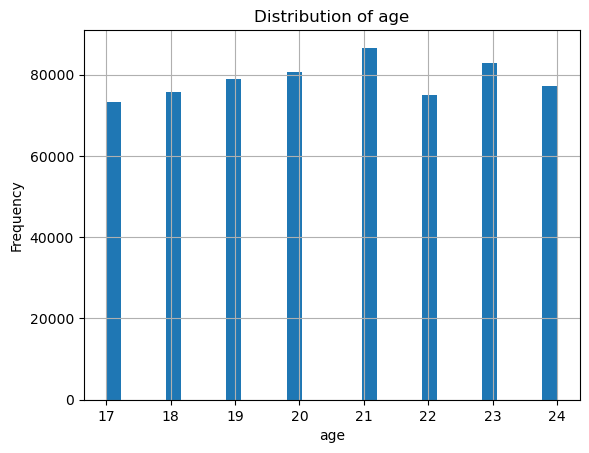

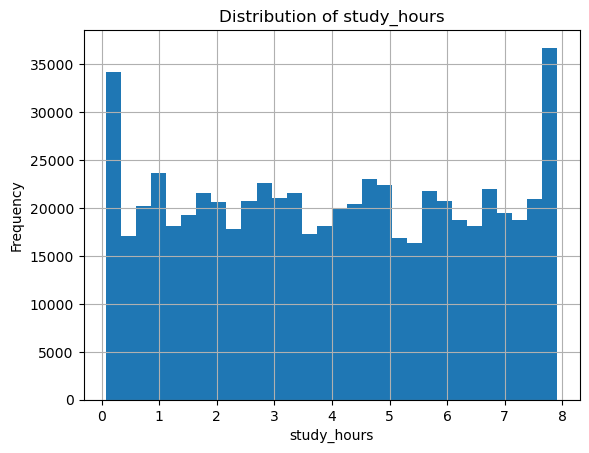

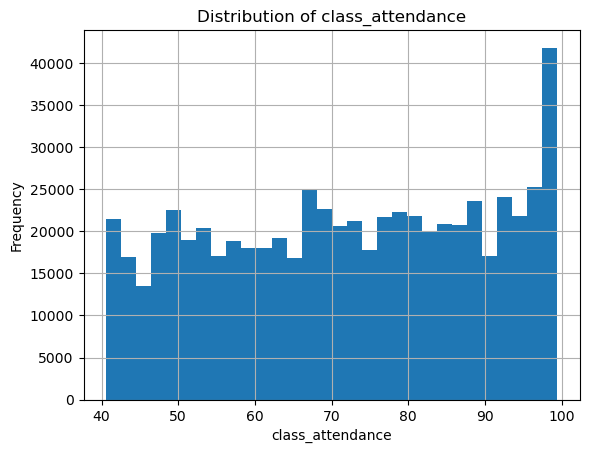

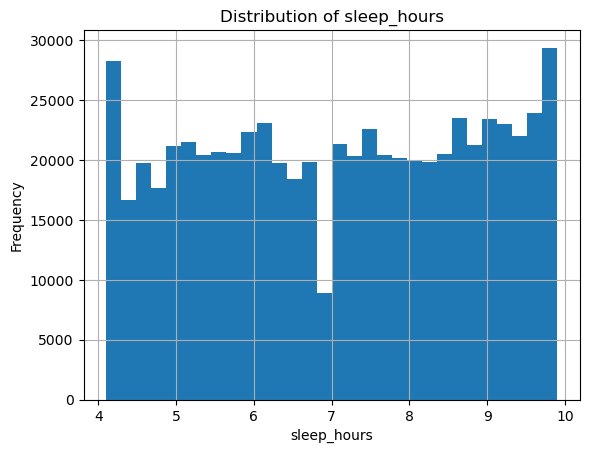

In [38]:
num_v.plot_numeric_distributions(df_train, num_cols)